# Phase 1: Exploratory Data Analysis

**Course**: IME 565 - Predictive Data Analytics for Engineers  
**Team**: Nicolo DiFerdinando, Joe Mascher, Rithvik Shetty  
**Phase**: Foundation Analytics

This notebook uses modular code from `src/` for clean, reusable analysis.

## 1. Setup and Imports

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Add src to path
sys.path.append(str(Path.cwd().parent))

# Import our custom modules
from src.data_processing import (
    load_spotify_data,
    identify_audio_features,
    clean_dataset,
    identify_column_names,
    get_dataset_summary
)
from src.feature_engineering import (
    create_composite_features,
    add_context_classification,
    get_normalized_features,
    get_composite_features
)
from src.visualization import (
    plot_feature_distributions,
    plot_correlation_matrix,
    plot_top_items,
    plot_context_distribution,
    print_summary_stats
)

# Settings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("All packages imported successfully!")

All packages imported successfully!


## 2. Load Data

In [2]:
# Load dataset
df, filename = load_spotify_data('../data/raw')
print(f"\nSuccessfully loaded: {filename}")

Found 2 CSV files in ../data/raw:
  1. dataset.csv (19.19 MB)
  2. artists.csv (61.89 MB)

Attempting to load: dataset.csv...
✓ Successfully loaded with utf-8 encoding
  114,000 rows and 21 columns

Successfully loaded: dataset.csv


In [3]:
# Identify available audio features
audio_features = identify_audio_features(df)


Available Audio Features (13):
  - danceability
  - energy
  - loudness
  - speechiness
  - acousticness
  - instrumentalness
  - liveness
  - valence
  - tempo
  - duration_ms
  - key
  - mode
  - time_signature


In [4]:
# Preview data
print("\nFirst 10 rows:")
df.head(10)


First 10 rows:


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [5]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

## 3. Data Cleaning

In [6]:
# Clean the dataset
df_clean = clean_dataset(df, audio_features)


Cleaning dataset...
Original dataset: 114,000 rows
  Removed 0 duplicate rows
  Removed 0 rows with missing audio features
  Removed 90 rows with invalid loudness values (>0 dB)
  Removed 1 rows with duration < 5 seconds

Final cleaned dataset: 113,909 rows (99.9% retained)


In [7]:
# Check for missing values
missing = df_clean.isnull().sum()
if missing.sum() > 0:
    print("\nRemaining missing values:")
    print(missing[missing > 0])
else:
    print("\nNo missing values in cleaned dataset!")


No missing values in cleaned dataset!


## 4. Feature Engineering

In [8]:
# Create composite features
df_clean = create_composite_features(df_clean)


✓ Created 4 composite features:
  - mood_score
  - grooviness
  - focus_score
  - relaxation_score


In [9]:
# Add context classification
df_clean = add_context_classification(df_clean)


Classifying listening contexts...

Context Distribution:
  General: 57,843 tracks (50.8%)
  Workout: 24,889 tracks (21.8%)
  Focus: 14,989 tracks (13.2%)
  Relaxation: 12,068 tracks (10.6%)
  Party: 4,120 tracks (3.6%)


## 5. Audio Feature Analysis

In [10]:
# Get normalized features for visualization
normalized_features = get_normalized_features(audio_features)
print(f"\nNormalized features for visualization: {normalized_features}")


Normalized features for visualization: ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']


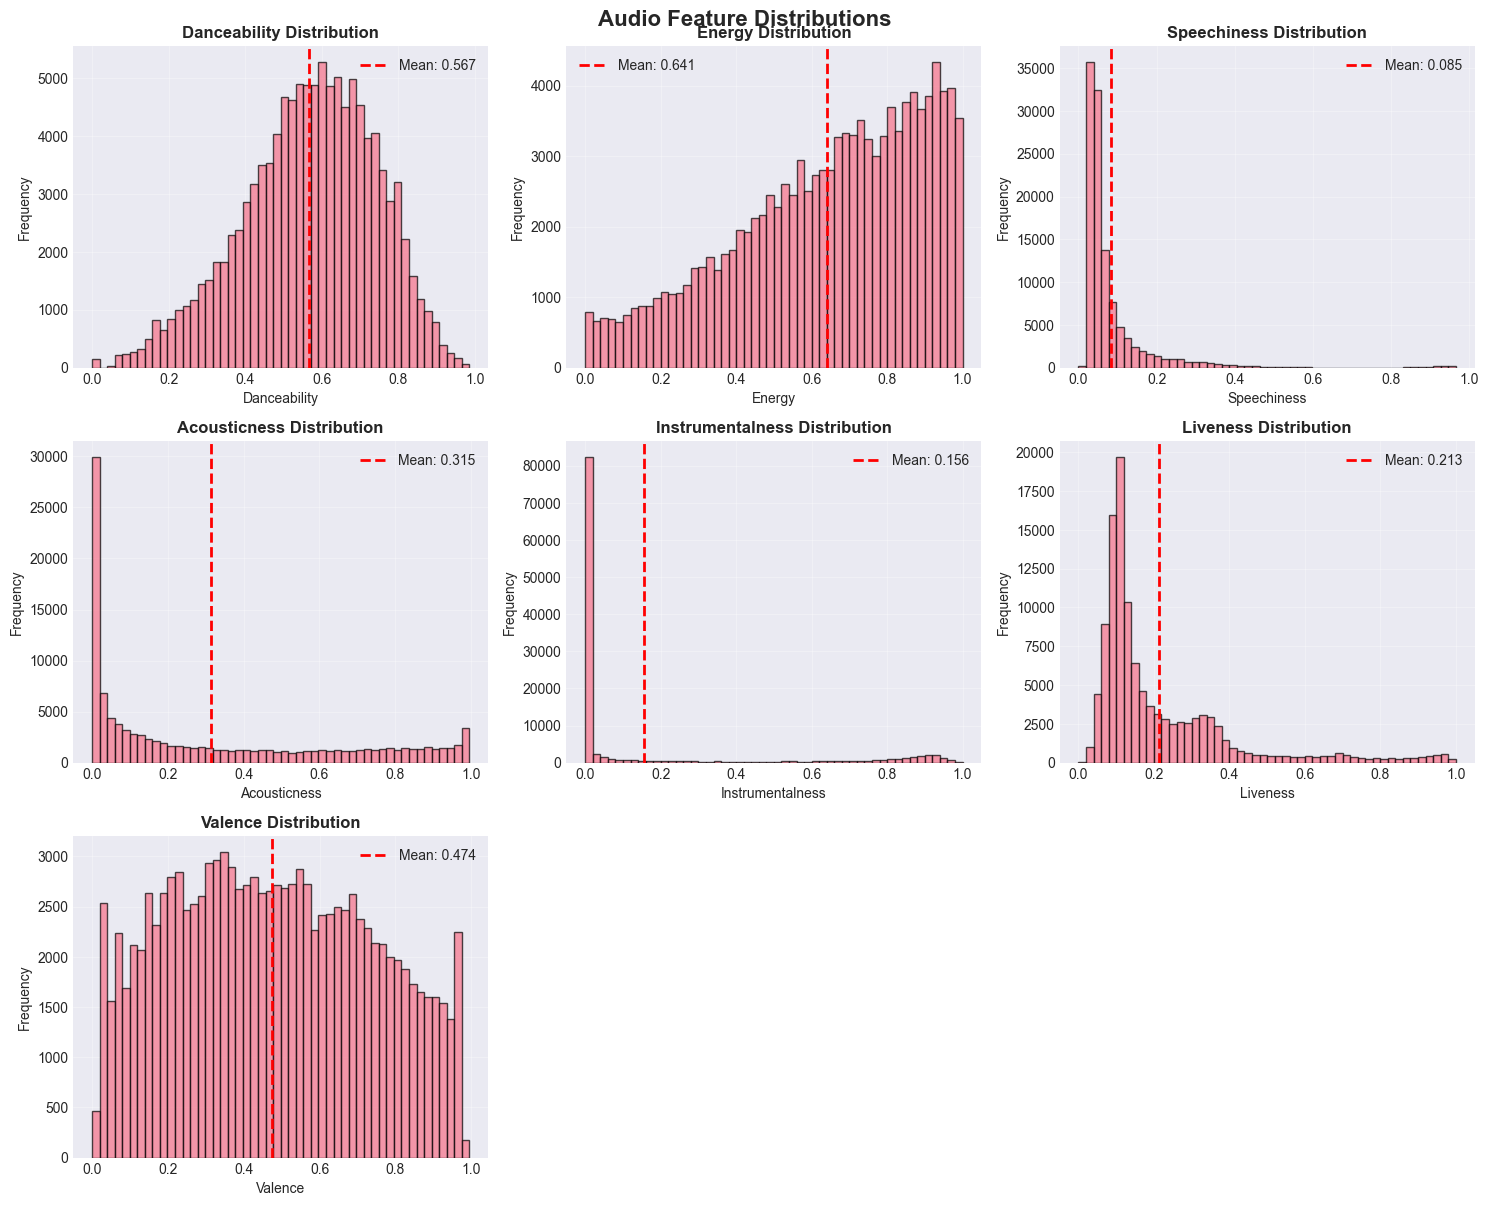

In [11]:
# Plot feature distributions
if normalized_features:
    plot_feature_distributions(df_clean, normalized_features)

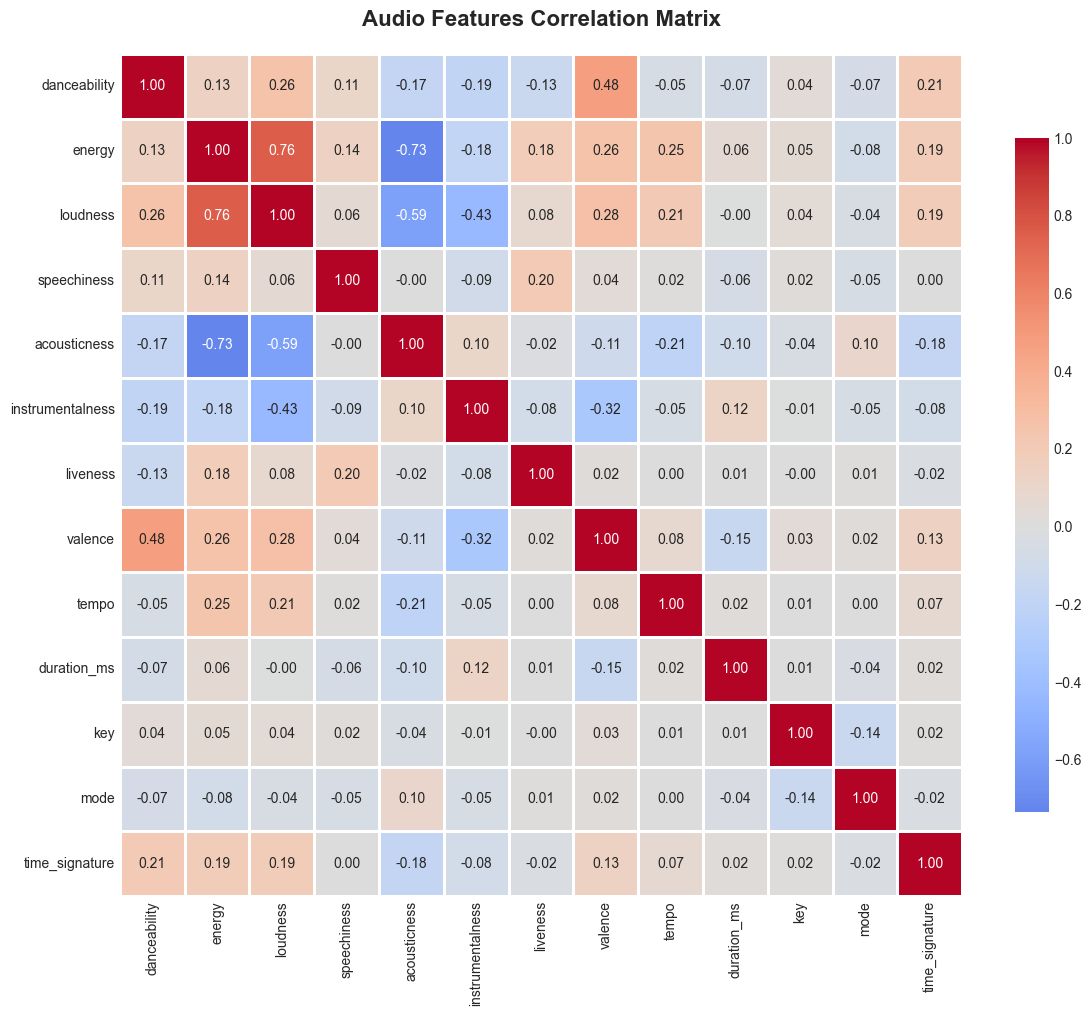


Strong Correlations (|r| > 0.5):
energy               <-> loudness            :  0.761
energy               <-> acousticness        : -0.734
loudness             <-> acousticness        : -0.590


In [12]:
# Correlation matrix
if len(audio_features) > 1:
    plot_correlation_matrix(df_clean, audio_features)

In [13]:
# Basic statistics
df_clean[audio_features].describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key,mode,time_signature
count,113909.000000,113909.000000,113909.000000,113909.000000,113909.000000,113909.000000,113909.000000,113909.000000,113909.000000,1.139090e+05,113909.000000,113909.000000,113909.000000
mean,0.566831,0.641143,-8.266017,0.084569,0.315080,0.156025,0.213489,0.474140,122.131632,2.280452e+05,5.309668,0.637623,3.904055
std,0.173512,0.251474,5.025014,0.105661,0.332573,0.309547,0.190360,0.259256,29.970699,1.073201e+05,3.560208,0.480689,0.432675
min,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000
25%,0.456000,0.472000,-10.016000,0.035900,0.016900,0.000000,0.098000,0.260000,99.197000,1.740660e+05,2.000000,0.000000,4.000000
50%,0.580000,0.684000,-7.008000,0.048900,0.169000,0.000042,0.132000,0.464000,122.016000,2.129060e+05,5.000000,1.000000,4.000000
75%,0.695000,0.853000,-5.009000,0.084500,0.598000,0.049000,0.273000,0.683000,140.069000,2.615060e+05,8.000000,1.000000,4.000000
max,0.985000,1.000000,-0.001000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.237295e+06,11.000000,1.000000,5.000000


## 6. Composite Features Analysis

In [14]:
# Get composite features that were created
composite_features = get_composite_features(df_clean)

if composite_features:
    print("\nComposite Feature Statistics:")
    print(df_clean[composite_features].describe())


Composite Feature Statistics:
          mood_score     grooviness    focus_score  relaxation_score
count  113909.000000  113909.000000  113909.000000     113909.000000
mean        0.566397       0.569624       0.563471          0.387518
std         0.203010       0.120025       0.128632          0.198848
min         0.000818       0.000000       0.032000          0.047872
25%         0.442420       0.507049       0.470358          0.227586
50%         0.590040       0.593507       0.560000          0.339373
75%         0.720600       0.656364       0.645740          0.520666
max         0.983825       0.839554       0.995200          0.998776


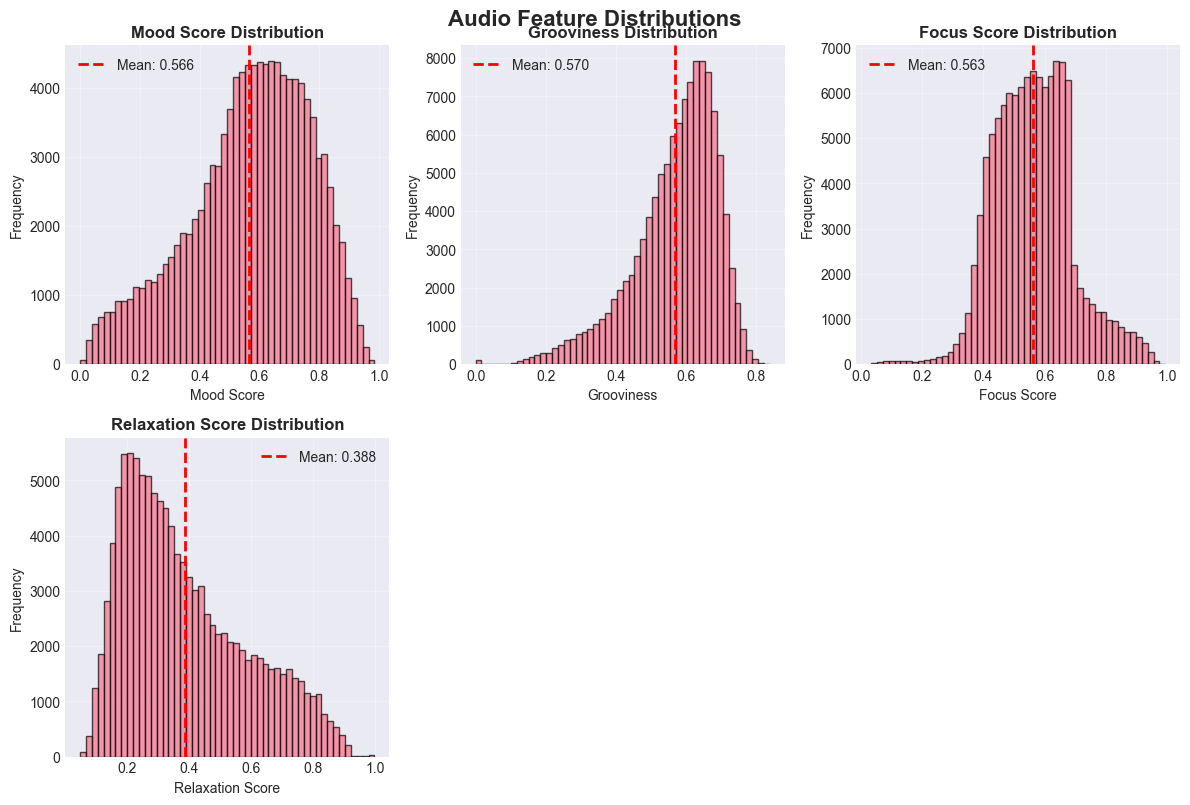

In [15]:
# Visualize composite features
if composite_features:
    plot_feature_distributions(df_clean, composite_features, figsize=(12, 8))

## 7. Top Charts Analysis

In [16]:
# Identify column names
columns = identify_column_names(df_clean)


Identified columns:
  Track: track_name
  Artist: artists
  Genre: track_genre
  Popularity: popularity


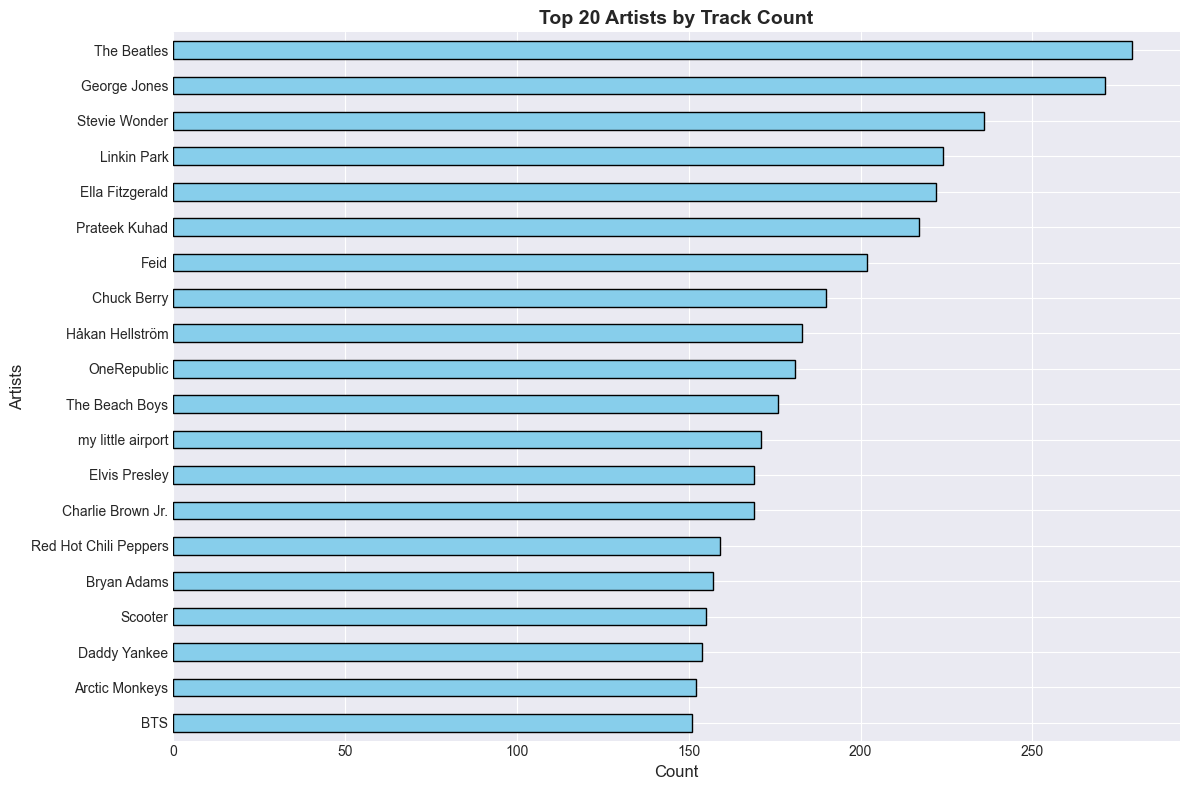


Top 20 Artists:
artists
The Beatles              279
George Jones             271
Stevie Wonder            236
Linkin Park              224
Ella Fitzgerald          222
Prateek Kuhad            217
Feid                     202
Chuck Berry              190
Håkan Hellström          183
OneRepublic              181
The Beach Boys           176
my little airport        171
Elvis Presley            169
Charlie Brown Jr.        169
Red Hot Chili Peppers    159
Bryan Adams              157
Scooter                  155
Daddy Yankee             154
Arctic Monkeys           152
BTS                      151
Name: count, dtype: int64


In [17]:
# Top Artists
if columns['artist']:
    top_artists = plot_top_items(
        df_clean,
        columns['artist'],
        "Top 20 Artists by Track Count",
        top_n=20
    )
    print("\nTop 20 Artists:")
    print(top_artists)

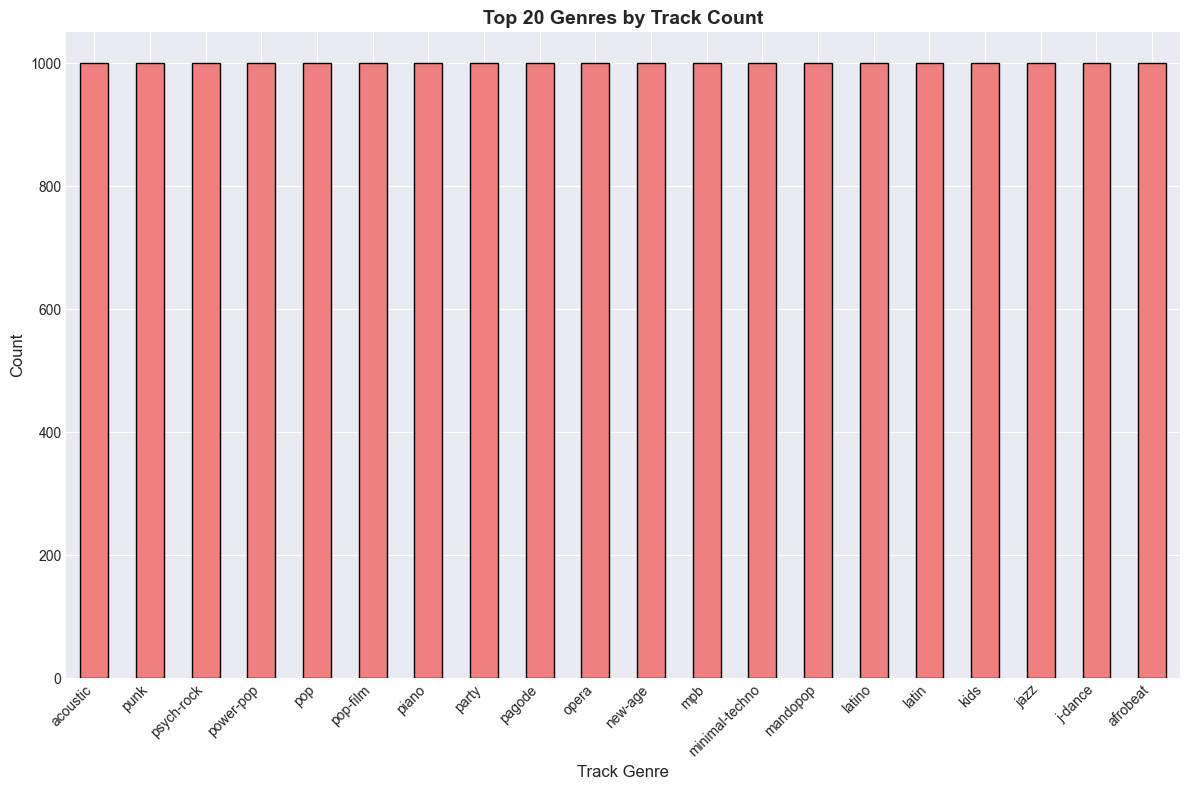


Top 20 Genres:
track_genre
acoustic          1000
punk              1000
psych-rock        1000
power-pop         1000
pop               1000
pop-film          1000
piano             1000
party             1000
pagode            1000
opera             1000
new-age           1000
mpb               1000
minimal-techno    1000
mandopop          1000
latino            1000
latin             1000
kids              1000
jazz              1000
j-dance           1000
afrobeat          1000
Name: count, dtype: int64


In [18]:
# Top Genres
if columns['genre']:
    top_genres = plot_top_items(
        df_clean,
        columns['genre'],
        "Top 20 Genres by Track Count",
        top_n=20,
        color='lightcoral',
        horizontal=False
    )
    print("\nTop 20 Genres:")
    print(top_genres)

## 8. Context Analysis

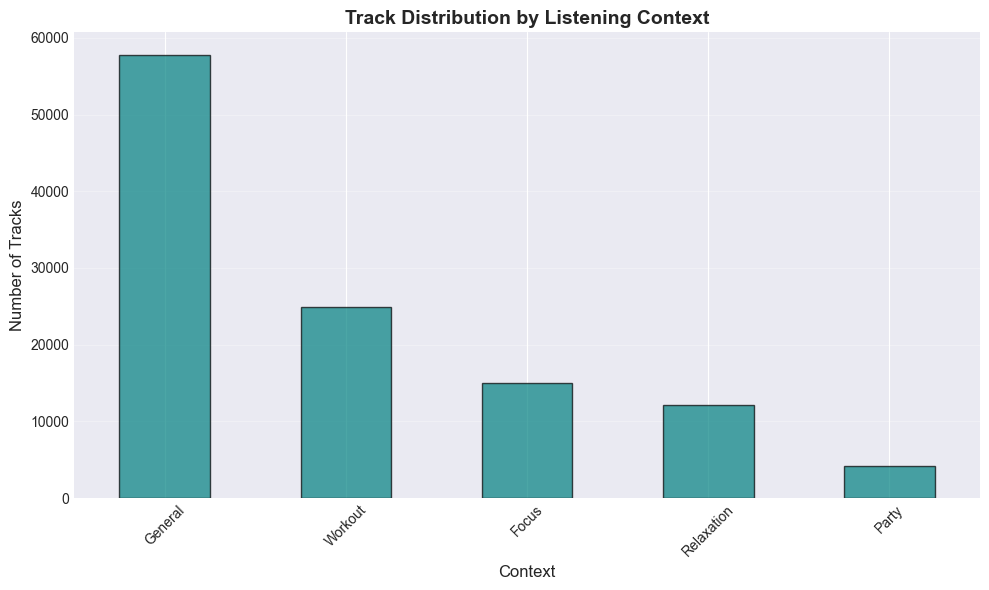

In [19]:
# Plot context distribution
plot_context_distribution(df_clean)

In [20]:
# Average audio features by context
feature_cols = ['energy', 'valence', 'danceability', 'acousticness', 'instrumentalness']
available_cols = [col for col in feature_cols if col in df_clean.columns]

if available_cols:
    print("\nAverage Audio Features by Context:")
    context_features = df_clean.groupby('context')[available_cols].mean()
    print(context_features.round(3))


Average Audio Features by Context:
            energy  valence  danceability  acousticness  instrumentalness
context                                                                  
Focus        0.474    0.272         0.454         0.464             0.832
General      0.683    0.461         0.534         0.243             0.030
Party        0.654    0.780         0.737         0.270             0.014
Relaxation   0.255    0.367         0.505         0.821             0.032
Workout      0.829    0.628         0.712         0.155             0.125


## 9. Export Processed Data

In [21]:
# Save processed data
output_path = Path('../data/processed/processed_spotify_data.csv')
df_clean.to_csv(output_path, index=False)

print(f"\n✓ Processed data saved to: {output_path}")
print(f"  Rows: {len(df_clean):,}")
print(f"  Columns: {len(df_clean.columns)}")
print(f"  File size: {output_path.stat().st_size / (1024*1024):.2f} MB")


✓ Processed data saved to: ../data/processed/processed_spotify_data.csv
  Rows: 113,909
  Columns: 26
  File size: 26.80 MB


## 10. Summary

In [ ]:
# Print comprehensive summary
print_summary_stats(df_clean, audio_features, columns)

print("\n✅ Phase 1 Analysis Complete!")
print("\nNext Steps:")
print("  1. Review visualizations and insights")
print("  2. Run Streamlit dashboard: streamlit run app/main.py")
print("  3. Prepare for Phase 2 (Playlist Intelligence)")

DATASET SUMMARY

Dataset Overview:
  Total tracks: 113,909
  Total columns: 26
  Audio features: 13

Artists:
  Unique artists: 31,408
  Top artist: The Beatles (279 tracks)

Genres:
  Unique genres: 114
  Top genre: acoustic (1,000 tracks)

Audio Characteristics:
  Average energy: 0.641
  Average valence (happiness): 0.474
  Average danceability: 0.567
  Average tempo: 122.1 BPM

Composite Scores:
  Average mood score: 0.566
  Average grooviness: 0.570
  Average focus score: 0.563
  Average relaxation score: 0.388

Listening Contexts:
  General: 57,843 tracks (50.8%)
  Workout: 24,889 tracks (21.8%)
  Focus: 14,989 tracks (13.2%)
  Relaxation: 12,068 tracks (10.6%)
  Party: 4,120 tracks (3.6%)

✅ Phase 1 Analysis Complete!

Next Steps:
  1. Review visualizations and insights
  2. Run Streamlit dashboard: streamlit run app/spotify_dashboard.py
  3. Prepare for Phase 2 (Playlist Intelligence)
